id                         int64
Data              datetime64[ns]
Link                      object
Titolo                    object
Testo                     object
Lang                      object
Stato Workflow              bool
dtype: object


,id,Data,Link,Titolo,Testo,Lang,Stato Workflow
21,1183085712,2023-10-01,http://www.instagram.com/p/Cx4rX8bIpqk,Carmine Abate Architetto - carmine_abate_archi...,Carmine Abate Architetto - carmine_abate_archi...,IT,True
147,1183650630,2023-10-01,http://www.instagram.com/p/Cx3WMtZt7TU,Hotel Muchele - hotel_muchele (5040069464),Hotel Muchele - hotel_muchele (5040069464) 42 ...,EN,True
148,1183650631,2023-10-02,http://www.instagram.com/p/Cx31kqFJtS0,AdrianaValle PatriciaCarvalho - migsarquitetur...,AdrianaValle PatriciaCarvalho - migsarquitetur...,EN,True
152,1183731635,2023-10-02,http://www.instagram.com/p/Cx38Y5ZysBx,miya《東京カフェ巡り》 - miya_tokyocafe (40616149605),miya《東京カフェ巡り》 - miya_tokyocafe (40616149605) 2...,JA,True
155,1183875489,2023-10-02,http://www.instagram.com/p/Cx4KaQbPMMx,✴︎an yuma✴︎ interior/life/beauty... - anyuma_n...,✴︎an yuma✴︎ interior/life/beauty... - anyuma_n...,JA,True
...,...,...,...,...,...,...,...
12832,1210172722,2023-10-31,https://twitter.com/matt_meeta/status/17195000...,matt_meeta@twitter.com (Fridtjof Meeta),"matt_meeta@twitter.com (Fridtjof Meeta) ph5, p...",EN,True
12833,1210172729,2023-10-31,https://twitter.com/HB/status/1719472193057206768,HB@twitter.com (House Beautiful UK),HB@twitter.com (House Beautiful UK) Why every ...,EN,True
12835,1210277547,2023-10-31,https://internityhome.pl/inspiracje/koncept-na...,Koncept na dom w klimacie przytulnego loftu | ...,Koncept na dom w klimacie przytulnego loftu | ...,PL,False
12837,1210710403,2023-10-31,https://www.elle.se/decoration/snygga-bordslam...,Snygg bordslampa 2023 – snygga köp till hemmet...,Snygg bordslampa 2023 – snygga köp till hemmet...,SV,True


Stato Workflow
False    4225
True     2632
Name: count, dtype: int64


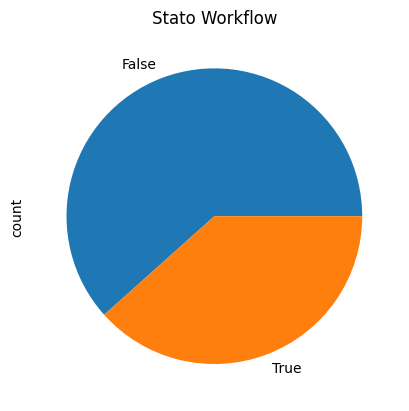

In [8]:
import sys
sys.path.append('../../../src')
from config import Paths
import pandas as pd

df = pd.read_csv(Paths.testnino1_classification_task, usecols=['id', 'Lang', 'Data', 'Link', 'Titolo', 'Testo', 'Stato Workflow'])

df['Data'] = pd.to_datetime(df['Data'])

target_column = 'Stato Workflow'

# remove rows not validated by the analyst
df = df[df[target_column] != 'N']

df['Stato Workflow'] = df['Stato Workflow'].map({'Y': True, 'D': False})

# lang = 'all'
# df = df[df['Lang'] == lang]

print(df.dtypes)
display(df)

import matplotlib.pyplot as plt

column_counts = df[target_column].value_counts()
print(column_counts)
column_counts.plot(kind='pie')
plt.title(target_column)
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# create balanced X_train and y_train
class_Y = df[df["Stato Workflow"] == True]
class_D = df[df["Stato Workflow"] == False]

train_size = 50

# Sample N instances from each class
sampled_Y = class_Y.sample(int(train_size / 2), random_state=42)
sampled_D = class_D.sample(int(train_size / 2), random_state=42)

# Concatenate the results
balanced_train = pd.concat([sampled_Y, sampled_D])

df_test = df[~df['id'].isin(balanced_train['id'])]

df_test.to_csv('TESTNINO1_boolean_StatoWorkflow_test.csv', index=False)

balanced_train.to_csv('TESTNINO1_boolean_StatoWorkflow_train.csv', index=False)

display(balanced_train[target_column].value_counts())
display(df_test[target_column].value_counts())

Stato Workflow
True     25
False    25
Name: count, dtype: int64

Stato Workflow
False    4200
True     2602
Name: count, dtype: int64